# Sarah A. Thomas  
# Project 2 - Axis Insurance

__Description__ (copied from project assignment) 

__Context__ - Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, the attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

__Objective__ – Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to do the following:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? (Hint- Formulate a hypothesis and prove/disprove it)
3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4. Is the proportion of smokers significantly different across different regions? (Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency())
5. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.
*Consider a significance level of 0.05 for all tests.

__Data Dictionary –__

1. Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2. Sex - This is the policy holder's gender, either male or female.
3. BMI - This is the body mass index (BMI), which provides a sense of how over or underweight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4. Children - This is an integer indicating the number of children/dependents covered by the insurance plan.
5. Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6. Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7. Charges​ - Individual medical costs billed to health insurance

# 1 - Load Packages and Read In the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore') #filter out warnings

In [2]:
axis_ins = pd.read_csv('AxisInsurance.csv')

# 2 - Initial Exploration of the Dataset

## 2.1 - Check the first and last 10 rows of the dataset

In [3]:
axis_ins.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
axis_ins.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


__Observation:__ Data looks clean and consistent with what was provided in the data dictionary.

## 2.2 - Check the shape of the data

In [5]:
axis_ins.shape

(1338, 7)

__Observation:__ The dataset has 1338 rows and 7 columns.

## 2.3 - Check the datatype of the variables

In [6]:
axis_ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

__Observation:__ Sex, smoker, and region should be converted to categorical variables.

In [7]:
axis_ins["sex"] = axis_ins["sex"].astype("category")
axis_ins["smoker"] = axis_ins["smoker"].astype("category")
axis_ins["region"] = axis_ins["region"].astype("category")

Re-checking datatypes to ensure conversion of datatype took place:

In [8]:
axis_ins.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

Conversion of datatype took place properly.

## 2.4 - Check for null values

In [9]:
axis_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


__Observation:__ No null values to contend with.

## 2.5 - Analyze quantitative variables

In [10]:
axis_ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


__Observations:__  
* Age ranges from 18-64, with mean and median very close in value (mean = 39.207, median = 39.000). This indicates near zero skewness.
* BMI ranges from 15.96-53.13, with mean and median very close in value (mean = 30.663, median = 30.400). This indicates near zero skewness.
* Number of children ranges from 0-5 with mean and median very close in value (mean = 1.095, median = 1.000). This indicates near zero skewness.
* Charges range from 1121.87-63770.43, a wide range. With the mean (13,270.42) greater than the median (9,382.03), the data is right-skewed.

## 2.6 - Analyze categorical variables

In [11]:
axis_ins.describe(include = ["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


__Observations:__  
* More males are policy holders (676) compared to females (662).
* Most policy holders do not smoke (1064).
* Most policy holders live in the southeast region of the U.S. (364).

# 3.0 - Univariate Analysis

In [12]:
# This function will allow us to create a boxplot and histogram for each quantitative 
# variable. (learned/customized from debrief of Project 1 Cardio Good Fitness)
def histogram_boxplot(feature, figsize=(10,8), bins=None):
    """ Boxplot and histogram combined
    feature: 1-d array
    figsize: size of fig
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                          sharex = True,
                                          gridspec_kw = {"height_ratios": (.25, .75)},
                                          figsize = figsize)
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'pink')
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # add median to the histogram


## 3.1 - Age

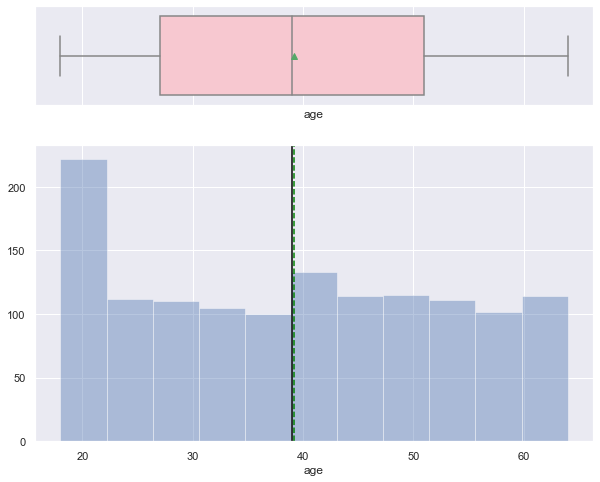

In [13]:
histogram_boxplot(axis_ins["age"])

__Observations:__
* There are no outliers.
* Mean and median are (approx.) 39 years.
* Q3 is 51 which means that 75% of customers are below age 51.

## 3.2 - BMI

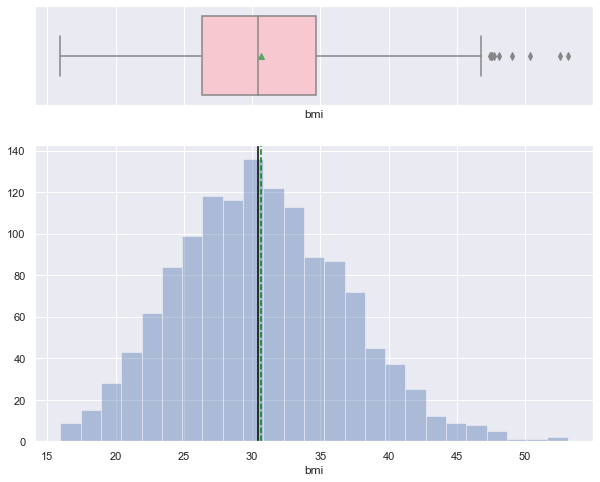

In [14]:
histogram_boxplot(axis_ins["bmi"])

__Observations:__  
* There are outliers for this variable.
* The mean and median are (approx.) 31.
* Q3 is 35 which means that 75% of customers have a BMI below 35.

## 3.3 - Children

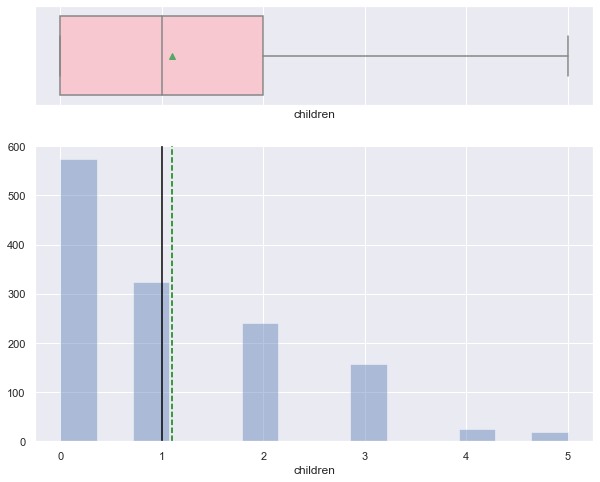

In [15]:
histogram_boxplot(axis_ins["children"])

__Observations:__
* There are no outliers.
* The mean and median are (approx.) 1 child.
* Q3 is 2 which means that 75% of policy holders have less than 2 children.

## 3.4 - Charges

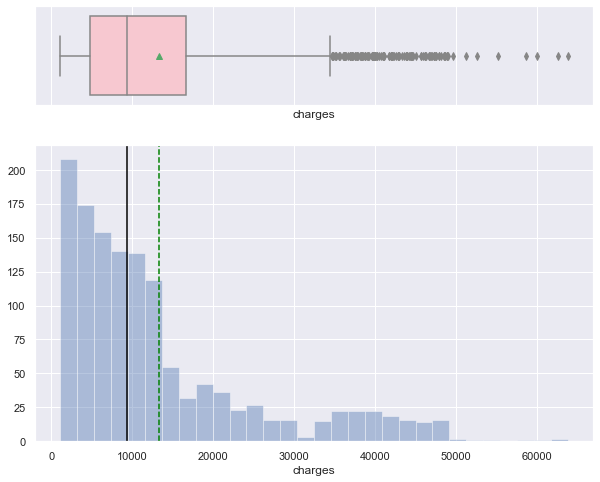

In [16]:
histogram_boxplot(axis_ins["charges"])

__Observations:__  
* There are outliers for this variable all on the higher end (above 35,000).
* The mean is greater than the median, therefore the data is right-skewed.
* Q3 is approx. 17,000 from looking at the boxplot (or from the data earlier in the analysis we know it's exactly 16,639.91). 75% of customer have been charged less than the value of Q3.

In [17]:
# Function that creates barplots with percentage displayed over each category.
# Learned/customized from debrief of Project 1 Cardio Good Fitness

def perc_on_bar(plot, feature):
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12) 
    plt.show() 

## 3.5 - Sex

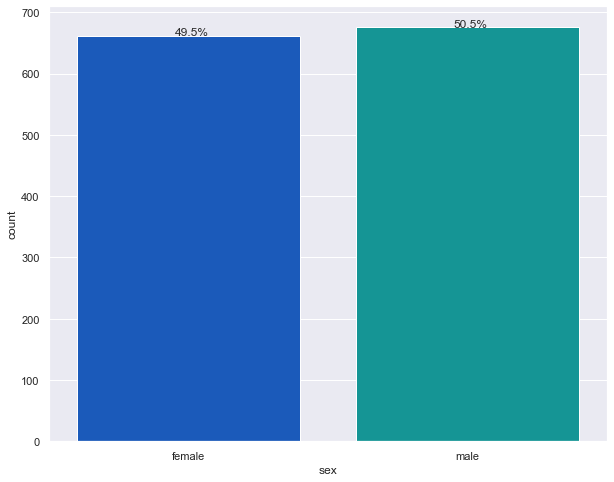

In [18]:
plt.figure(figsize=(10,8))
ax = sns.countplot(axis_ins["sex"], palette='winter')
perc_on_bar(ax,axis_ins["sex"])

__Observation:__ There are more male than female policy holders but just barely by 1%.

## 3.6 - Smoker

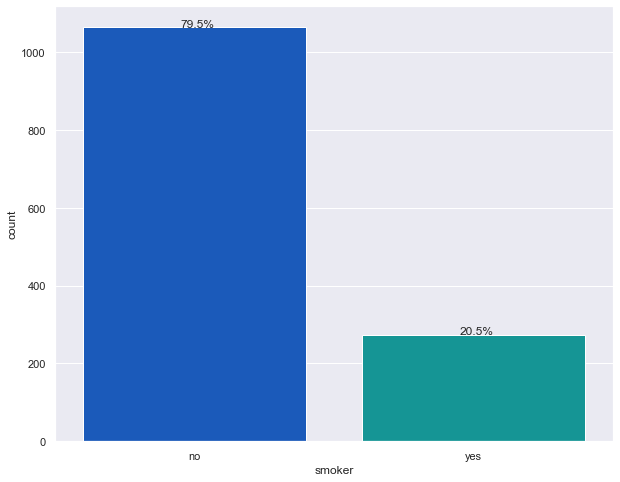

In [19]:
plt.figure(figsize=(10,8))
ax = sns.countplot(axis_ins["smoker"], palette="winter")
perc_on_bar(ax, axis_ins["smoker"])

__Observation:__ Non-smokers greatly outnumber smokers.

## 3.7 - Region

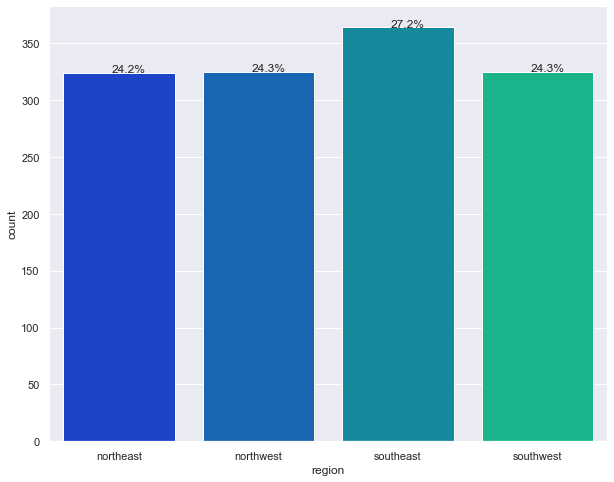

In [20]:
plt.figure(figsize=(10,8))
ax = sns.countplot(axis_ins["region"], palette="winter")
perc_on_bar(ax, axis_ins["region"])

__Observation:__ More policy holders live in the southeast region than the other regions, but the rest of the policy holders are evenly split between the remaining three regions.

# 4.0 - Multivariate Analysis

## 4.1 - Correlation

<AxesSubplot:>

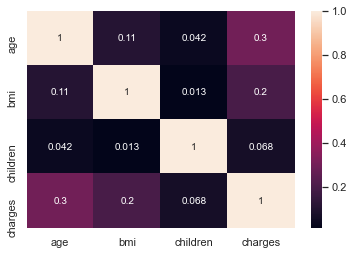

In [21]:
correlation = axis_ins.corr()
sns.heatmap(correlation, annot=True)

__Observation:__  None of the variables seem particularly highly correlated. There is a slight correlation between (1) charges and age, and (2) bmi and charges.

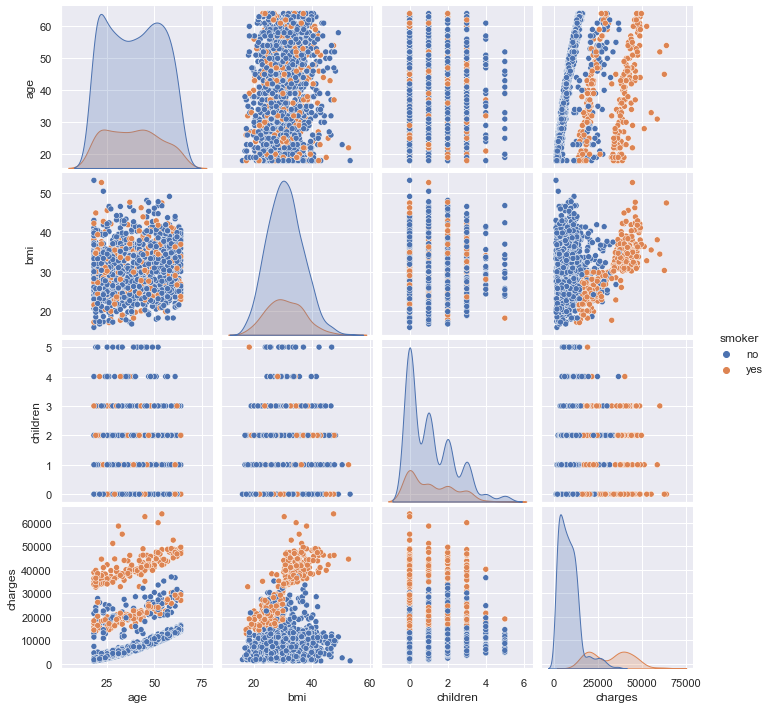

In [22]:
sns.pairplot(axis_ins, hue = "smoker")

__Observation:__  Trends worth further investigation include age vs. charges, bmi vs. charges, children vs. charges taking into consideration 'smoker' variable as hue.

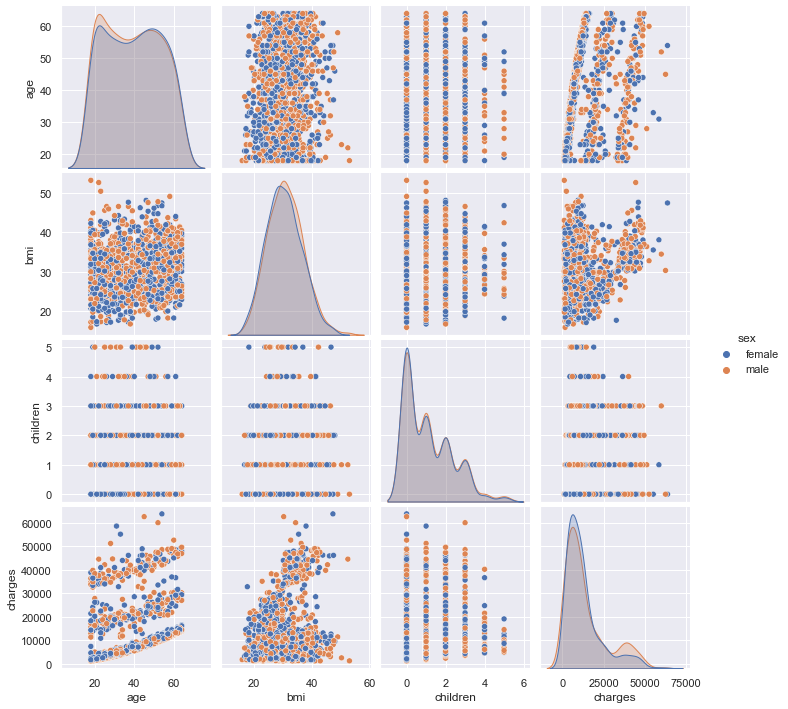

In [23]:
sns.pairplot(axis_ins, hue = "sex")

__Observation:__ Trends worth investigating further include age vs. charges and bmi vs. charges.

## 4.2 - Age vs. Charges vs. Smoker

<AxesSubplot:xlabel='age', ylabel='charges'>

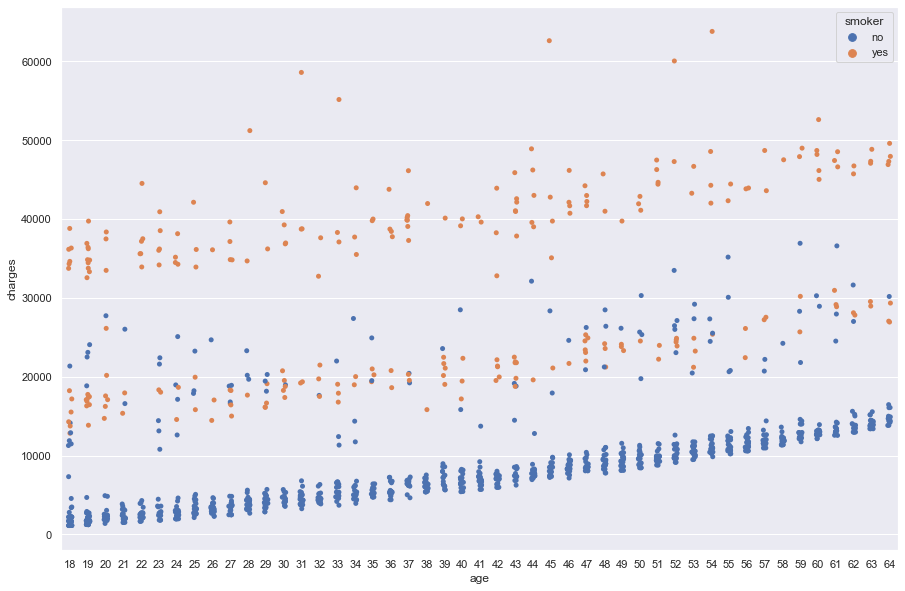

In [24]:
plt.figure(figsize = (15, 10))
sns.stripplot(axis_ins['age'], axis_ins['charges'], hue = axis_ins["smoker"])

__Observation:__ We notice two insights: (1) as age increases, charges tend to increase, and (2) smokers tend to have higher charges.

## 4.3 - BMI vs. Charges vs. Smoker

<AxesSubplot:xlabel='bmi', ylabel='charges'>

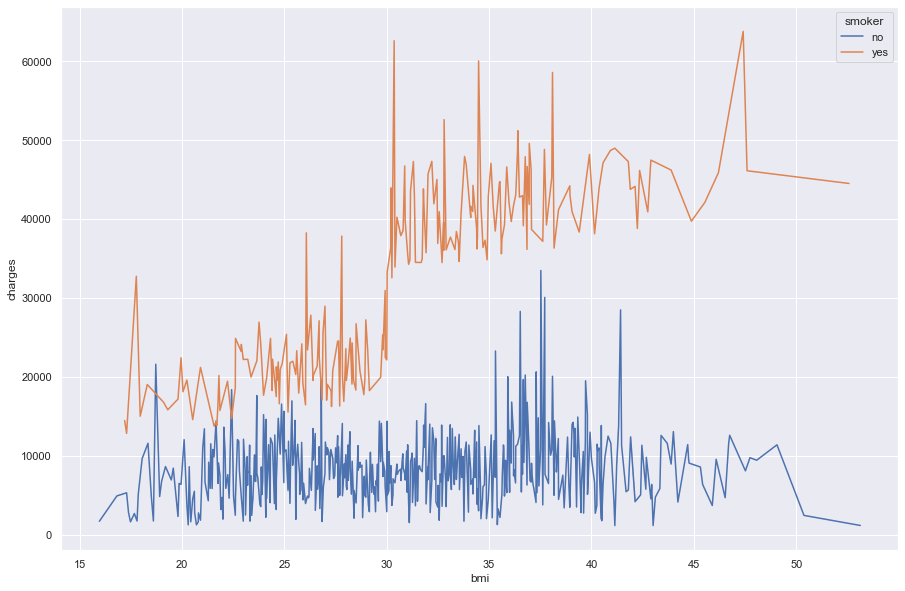

In [35]:
plt.figure(figsize = (15, 10))
sns.lineplot(axis_ins['bmi'], axis_ins['charges'], hue=axis_ins['smoker'], ci=0)

__Observations:__ The BMI of smokers increases along with charges (significant jump at BMI = 30).

## 4.4 - Children vs. Charges vs. Smoker

<AxesSubplot:xlabel='children', ylabel='charges'>

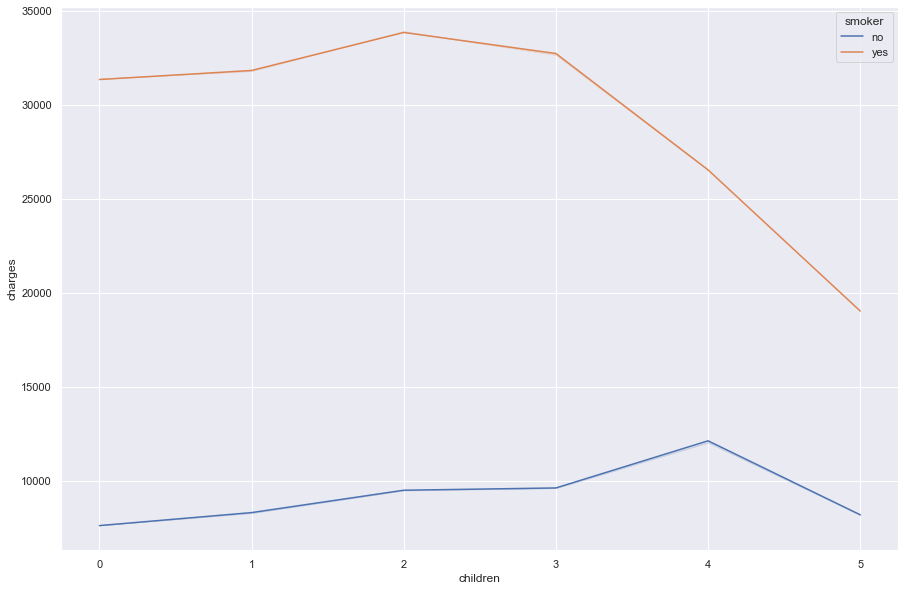

In [36]:
plt.figure(figsize = (15,10))
sns.lineplot(axis_ins['children'], axis_ins['charges'], hue = axis_ins['smoker'], ci=0)

__Observations:__ Charges are higher for smokers. For smokers, a decrease in charges occurs for those having 2 or more children.

# 5.0 - Statistical Tests

## 5.1 - Smokers' medical claims

__Question:__ Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? (Hint- Formulate a hypothesis and prove/disprove it)

__Hypothesis:__  
$\mu$1 = mean of medical claims by smokers  
$\mu$2 = mean of medical claims by non-smokers

H_0: $\mu$1 = $\mu$2  
H_a: $\mu$1 > $\mu$2

In [25]:
axis_ins["charges"][axis_ins["smoker"]=="yes"].var()

133207311.20634921

In [26]:
axis_ins["charges"][axis_ins["smoker"]=="no"].var()

35925420.49611172

__Perform T-Test__

In [27]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(axis_ins["charges"][axis_ins["smoker"]=="yes"],
                               axis_ins["charges"][axis_ins["smoker"]=="no"], equal_var=False,
                               alternative="greater")
p_value

2.94473222335849e-103

__Conclusion:__ Since the p-value is less than 0.05 we can reject the null hypothesis that the means are equal and conclude that the medical claims by smokers are greater than that of non-smokers.

## 5.2 - Are the BMI of females different than males?

__Question:__ Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

__Hypothesis:__  
$\mu$1 = mean of female BMI  
$\mu$2 = mean of male BMI  

H_0: $\mu$1 = $\mu$2  
H_a: $\mu$1 $\neq$ $\mu$2

In [28]:
axis_ins["bmi"][axis_ins["sex"]=="female"].var()

36.554395153365576

In [29]:
axis_ins["bmi"][axis_ins["sex"]=="male"].var()

37.70493727081969

__Perform T-Test__

In [30]:
test_stat, p_value = ttest_ind(axis_ins["bmi"][axis_ins["sex"]=="female"],
                               axis_ins["bmi"][axis_ins["sex"]=="male"], 
                              equal_var=False, alternative = "two-sided")
p_value

0.08992430667834876

__Conclusion:__ Since the p-value is greater than 0.05 we cannot reject the null hypothesis and we must conclude that the mean of female and male BMIs are the same (BMIs do not differ significantly according to gender).

## 5.3 - Is the proportion of smokers significantly different across different regions? 

__Question:__ Is the proportion of smokers significantly different across different regions? (Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency())

__Hypothesis:__  
H_0: Smoking and region are independent  
H_a: Smoking and region are not independent

In [31]:
table = pd.crosstab(axis_ins['smoker'],axis_ins['region'])

from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(table)

p_value

0.06171954839170547

__Conclusion:__ Since the p-value is greater than 0.05 we cannot reject the null hypothesis and must conclude that smoking and region are independent (proportion of smokers not significantly different across different regions).

## 5.4 - Is the mean BMI of women with no children, one child, and two children the same?

__Question:__ Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

$\mu$1 = mean BMI of women with no children
$\mu$2 = mean BMI of women with 1 child
$\mu$3 = mean BMI of women with 2 children

__Hypothesis:__  
H_0: $\mu$1 = $\mu$2 = $\mu$3  
H_a: At least one mean ($\mu$1, $\mu$2, $\mu$3) is not equal to the other means

In [32]:
female = axis_ins[axis_ins["sex"]=="female"]
female

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [33]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(female["bmi"][female["children"]==0], 
                              female["bmi"][female["children"]==1], 
                              female["bmi"][female["children"]==2])

p_value

0.7158579926754841

__Conclusion:__ Since the p-value is greater than 0.05 we cannot reject the null hypothesis and must conclude that the mean BMIs of women with no children, one child, and two children are the same, or in other words BMI is not impacted by number of children.